### Imports


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

### Data Collection


In [3]:
# Load dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

### Feature Transformation & Model Training


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Prediction & Evaluation


In [5]:
# Predict
y_pred = log_reg.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Kappa Score: {kappa:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Kappa Score: 0.96


### Show Confusion Matrix


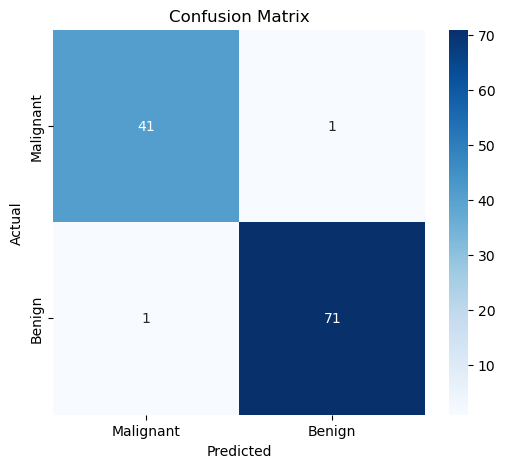

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### AUC ROC curve


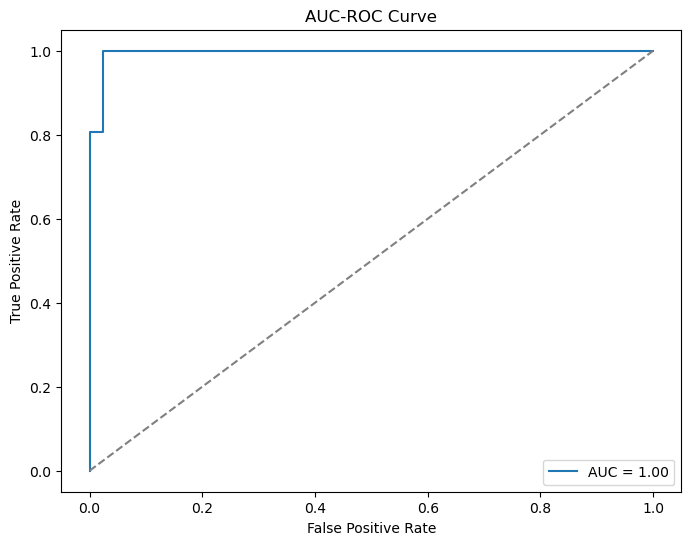

In [11]:
# Get predicted probabilities for positive class
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Cross-fold Validation


In [13]:
# Perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring="accuracy")

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores: [0.92982456 0.92982456 0.92982456 0.92982456 0.94736842 0.96491228
 0.92982456 0.94736842 0.96491228 0.96428571]
Mean Accuracy: 0.94
Standard Deviation: 0.02


/opt/anaconda3/envs/CSB320_InClass/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/CSB320_InClass/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [15]:
# Define hyperparameter grid
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Hyperparameters: {'C': 0.1}
Best Cross-Validation Accuracy: 0.98
